# Linear Regression Model

> In this post, We will cover the use case of Linear Regression Model through StatsModels and scikit-learn.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Machine_Learning]
- image: images/baseline_knn.png

## Resources & Credits
The dataset that we use are from the book `Introduction to Statistical Learning` by Gareth James, Daniela Witten, Trevor Hastie, and Rob Tibshirani. You can check the details in [here](https://www.statlearning.com/).

## Packages

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Credit - Load the dataset and EDA
We just use `Gender` and `Balance` column. And `Balance` will be the response variable (also denoted as $y$)

In [2]:
credit = pd.read_csv('./dataset/Credit.csv', index_col=0)
credit = credit[['Gender', 'Balance']]

In [4]:
credit.shape

(400, 2)

In [3]:
credit.head()

,Gender,Balance
1,Male,333
2,Female,903
3,Male,580
4,Female,964
5,Male,331


## Credit - Data Preprocessing
Currently, `Gender` variable is categorical variable, and its type is text. In order to use it as an feature, we need to convert from text to integer (or binary). 

We can use label encoder which can convert categorical data to numerical, but in this time we'll use lambda notation to convert it.

In [10]:
X = credit['Gender'].to_numpy()
X[:6]

array(['Male', 'Female', 'Male', 'Female', 'Male', 'Male'], dtype=object)

In [13]:
X_temp = list(map(lambda x: 1 if x == 'Female' else -1, X))
np.array(X_temp[:6])

array([-1,  1, -1,  1, -1, -1])

In [12]:
y = credit['Balance'].to_numpy()
y[:6]

array([ 333,  903,  580,  964,  331, 1151])

To insert the data in to statsmodel, we also need to convert it with dataframe.

In [15]:
df = pd.DataFrame({'y': y, 'X_temp': X_temp},
                   columns=['y', 'X_temp'])
df.head()

,y,X_temp
0,333,-1
1,903,1
2,580,-1
3,964,1
4,331,-1


## Credit - Ordinary Least Squares (OLS)
OLS is a type of linear least squares for estimating unknown parameters in a linear regression model. And it chooses the parameters of a linear function of a set of explanatory variables by the principles of least squares. You can train the model with
$$ y \sim x_0 + x_1 + \dots $$

which is similar in `R`.

In [17]:
categorical_reg = smf.ols(formula='y ~ x_temp', data=df)
result = categorical_reg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.669
Time:                        17:00:56   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    519.6697     23.026     22.569      0.000     474.403     564.937
x_temp         9.8666     23.026      0.429      0.669     -35.400      55.134
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can find the coefficient of each variable, and also find the p-value for determining the validity of that variables.

## Advertising - Load the dataset and EDA
In this time, we will use Advertising dataset

In [19]:
advertising = pd.read_csv('./dataset/Advertising.csv', index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


And we will use two variables(`TV`, `radio`) for predict `sales` variable.

In [20]:
X = advertising[['TV', 'radio']].to_numpy()
X[:6]

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9]])

## Advertising - Interaction term
In this time, we will add the iteraction term, which is the comination of existed variables.
For example, if we have $x_0$, and $x_1$ variables, when we try to build the linear model with interaction term, the form will be like this:

$$ y \sim x_0 + x_1 + x_0 \cdot x_1 + \dots $$

In this case, we just add the **two-way interaction** since the new iteraction term is made with two independent variables. 

In [21]:
inter_X = X[:, 0] * X[:, 1]
inter_X[:6]

array([8697.78, 1748.85,  789.48, 6256.95, 1952.64,  425.43])

In [22]:
y = advertising['sales'].to_numpy()
y[:6]

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2])

In [23]:
df = pd.DataFrame({'sales': y, 'TV':X[:, 0], 'radio':X[:, 1], 'inter':inter_X},
                  columns=['sales', 'TV', 'radio', 'inter'])
df.head()

,sales,TV,radio,inter
0,22.1,230.1,37.8,8697.78
1,10.4,44.5,39.3,1748.85
2,9.3,17.2,45.9,789.48
3,18.5,151.5,41.3,6256.95
4,12.9,180.8,10.8,1952.64


## Advertising - Ordinary Least Squares (OLS)

In [24]:
inter_reg = smf.ols(formula='sales ~ TV + radio + inter', data=df)
result = inter_reg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 20 May 2021   Prob (F-statistic):          6.68e-146
Time:                        17:17:41   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
inter          0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## KNN - Data Preparation

In this section, we will check the availability KNN for Linear regression model.

In [26]:
np.random.seed(1)

In [27]:
X_train = np.sort(np.random.uniform(-1, 1, 200))[:, np.newaxis]
X_train[:6]

array([[-0.99977125],
       [-0.99425935],
       [-0.97488804],
       [-0.97209685],
       [-0.96835751],
       [-0.96342345]])

Here, we made a simple true label as follows:

$$ y = 10 * x - 10 * x^3 + \epsilon $$

In [30]:
y_train = 10 * X_train - 10 * np.power(X_train, 3) + np.random.normal(0, 1, 200)[:, np.newaxis]
y_train[:6]

array([[-0.17277226],
       [-0.28800666],
       [-0.02231515],
       [-1.71090527],
       [ 0.40699805],
       [ 0.22813283]])

In [31]:
X_test = np.random.uniform(-1, 1, 100)[:, np.newaxis]
X_test[:6]

array([[ 0.65627072],
       [-0.14730369],
       [-0.30860236],
       [ 0.34994321],
       [-0.55703589],
       [-0.06550835]])

In [32]:
y_test = 10 * X_test - 10 * np.power(X_test, 3) + np.random.normal(0, 1, 100)[:, np.newaxis]
y_test[:6]

array([[ 4.47956312],
       [-2.95064709],
       [-3.87283553],
       [ 3.79636477],
       [-3.88111616],
       [-0.8810265 ]])

The train data will be like this:

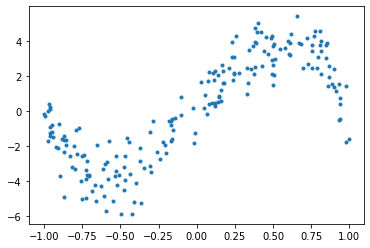

In [34]:
plt.plot(X_train, y_train, marker='o', markersize=3, linestyle='none')

## KNN - Training

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [36]:
y_pred = knn.predict(X_test)
y_pred[:6]

array([[ 4.37544302],
       [-1.02342249],
       [-2.60466271],
       [ 2.49433106],
       [-3.58803561],
       [ 0.25149095]])

You can use `mean_squared_error` implemented in `sklearn.metrics`, but we can also manually implement it.

In [37]:
mse = (((y_pred - y_test) ** 2).sum() / len(y_pred))
mse

1.3771641150099767

## KNN - Evaluation
Compare the KNN with simple linear regression.

In [46]:
simple_reg = sm.OLS(y_train, X_train).fit()
y_pred_simple = simple_reg.predict(X_test)
baseline_mse = ((y_pred_simple - np.squeeze(y_test)) ** 2).sum() / len(y_pred_simple)
baseline_mse

2.811298016232866

It is important to choose which `n_neighbors` is optimal.

In [49]:
mse = []
for k in range(1, 100):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse.append(((y_pred - y_test) ** 2).sum() / len(y_test))

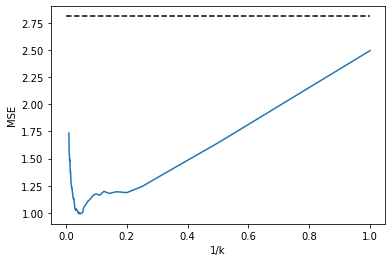

In [52]:
plt.hlines(baseline_mse, 0, 1, linestyle='--')
plt.plot(1 / np.arange(1, 100), mse)
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.show()